In [155]:
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data
from libs.datasets import MNIST
import os
import pandas as pd
from libs.utils import montage
from libs import gif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn import preprocessing
from six.moves import cPickle as pickle
%matplotlib inline

# Data

In [154]:
rootdir = "db/notMNIST_large/"
image_names = []
labels = []
[subdirs for subdirs in os.listdir(rootdir)]
#[img for img in os.listdir(d) if img.endswith('png')]
for dirpath, dirname, files in os.walk(rootdir):
    for f in files:
        if f.endswith('.png'):
            image_names.append(os.path.join(dirpath,f))
            labels.append(dirpath.split('/')[2])
print image_names[:5], labels[:5], len(image_names)
print len(image_names)

['db/notMNIST_large/A/a29ydW5pc2hpLnR0Zg==.png', 'db/notMNIST_large/A/a2F6b28udHRm.png', 'db/notMNIST_large/A/a2FkZW4udHRm.png', 'db/notMNIST_large/A/a2FpcmVlLnR0Zg==.png', 'db/notMNIST_large/A/a2Fua2FuYSBLLnR0Zg==.png'] ['A', 'A', 'A', 'A', 'A'] 529119
529119


In [157]:
def do_pickle(dataset, set_filename):
    try:
        with open(set_filename, 'wb') as f:
            pickle.dump(dataset, f, pickle.HIGHEST_PROTOCOL)
    except Exception as e:
        print('Unable to save data to', set_filename, ':', e)

do_pickle([image_names, labels], "data_names.pkl")

In [306]:
# pickle_file = 'notMNIST.pickle'

# with open(pickle_file, 'rb') as f:
#   save = pickle.load(f)
#   train_dataset = save['train_dataset']
#   train_labels = save['train_labels']
#   valid_dataset = save['valid_dataset']
#   valid_labels = save['valid_labels']
#   test_dataset = save['test_dataset']
#   test_labels = save['test_labels']
#   del save  # hint to help gc free up memory
#   print('Training set', train_dataset.shape, train_labels.shape)
#   print('Validation set', valid_dataset.shape, valid_labels.shape)
#   print('Test set', test_dataset.shape, test_labels.shape)

In [169]:
def load_data(number_of_images=900):
    data = []
    target = []
    for i in range(1, number_of_images + 1):
        rand_int = np.random.randint(0,len(image_names))
        img_name = image_names[rand_int]
        label = labels[rand_int]
        try:
            img = plt.imread(img_name)
        except:
            continue
        data.append(img)
        target.append(label)
    #     plt.subplot(number_of_images,1,i)
    #     plt.imshow(img)
    #     plt.ylabel(label)
    return np.array(data), target

tensor_data, target = load_data(1000)

In [242]:
print "data shape:", tensor_data.shape
print "target shape:", len(target)

data shape: (1000, 28, 28)
target shape: 1000


# Pre-processing

G


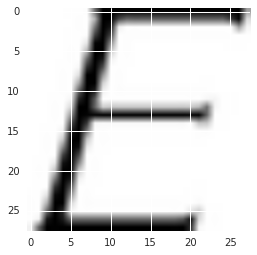

In [243]:
# enc = preprocessing.OneHotEncoder()
# enc.fit(target)
X = tensor_data.reshape([1000,28*28])
y = target
img = X[0].reshape((28,28))
print target[89]
plt.imshow(img)

(1000, 784)
mean: 1.05877315804e-08 std: 1.0


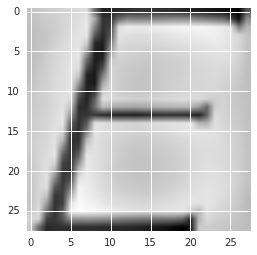

In [244]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
print X_scaled.shape
plt.imshow(X_scaled[0].reshape(28,28))
print "mean: {} std: {}".format(X_scaled.mean(), X_scaled.std())

key:  A #: 93
key:  C #: 80
key:  B #: 100
key:  E #: 118
key:  D #: 109
key:  G #: 94
key:  F #: 120
key:  I #: 107
key:  H #: 91
key:  J #: 88


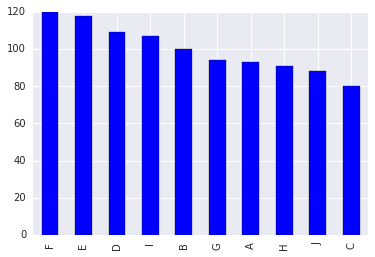

In [245]:
counter_dict = {}
for el in y:
    if el in counter_dict:
        counter_dict[el] += 1
    else:
        counter_dict[el] = 1

for key in counter_dict:
    print "key: ", key, "#:", counter_dict[key]

df = pd.DataFrame(data = y, columns=['y'])
df.y.value_counts().plot(kind='bar')

# Test/train/validation split

In [246]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.10)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=10/90.)
print "unique classes: ", np.unique(target)
print "number of classes:", len(np.unique(target))
print np.shape(X_train), np.shape(X_test), np.shape(X_validation)
print np.shape(y_train), np.shape(y_test), np.shape(y_validation)

unique classes:  ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J']
number of classes: 10
(800, 784) (100, 784) (100, 784)
(800,) (100,) (100,)


# Logit classification

In [253]:
logreg = LogisticRegression()#C=1e5)
logreg.fit(X_train,y_train)
print logreg.score(X_train, y_train)
print logreg.score(X_test, y_test)
print logreg.score(X_validation, y_validation)

1.0
0.6
0.5


In [254]:
N = 50
tensor_data, target = load_data(N)
X = tensor_data.reshape([N,28*28])
y = target
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.10)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=10/90.)
logreg = LogisticRegression()#C=1e5)
logreg.fit(X_train,y_train)
print logreg.score(X_train, y_train)
print logreg.score(X_validation, y_validation)
print logreg.score(X_test, y_test)

1.0
0.4
0.4


In [255]:
N = 100
tensor_data, target = load_data(N)
X = tensor_data.reshape([N,28*28])
y = target
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.10)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=10/90.)
logreg = LogisticRegression()#C=1e5)
logreg.fit(X_train,y_train)
print logreg.score(X_train, y_train)
print logreg.score(X_validation, y_validation)
print logreg.score(X_test, y_test)

1.0
0.4
0.5


In [259]:
N = 1000
tensor_data, target = load_data(N)
X = tensor_data.reshape([N,28*28])
y = target
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.10)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=10/90.)
logreg = LogisticRegression()#C=1e5)
logreg.fit(X_train,y_train)
print logreg.score(X_train, y_train)
print logreg.score(X_validation, y_validation)
print logreg.score(X_test, y_test)

0.9975
0.73
0.77


In [260]:
N = 5000
tensor_data, target = load_data(N)
X = tensor_data.reshape([N,28*28])
y = target
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.10)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=10/90.)
print "training size:", X_train.shape, "testing size:", X_test.shape
logreg = LogisticRegression()#C=1e5)
logreg.fit(X_train,y_train)
print logreg.score(X_train, y_train)
print logreg.score(X_validation, y_validation)
print logreg.score(X_test, y_test)

training size: (4000, 784) testing size: (500, 784)
0.9895
0.792
0.764


# Deep Learning

In [269]:
image_size = 28
num_labels = 10
N = 5000

tensor_data, target = load_data(N)
X = tensor_data.reshape([N,image_size*image_size])

# normalize input
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# from labels to ints
og = label_encoder.inverse_transform(y)
print og
encoder = preprocessing.LabelEncoder()
code = encoder.fit_transform(og)
print code

# binarize labels
y = target
label_encoder = preprocessing.LabelBinarizer()
label_encoder.fit(y)
print "classes:", label_encoder.classes_
encoded = label_encoder.transform(y)
original = label_encoder.inverse_transform(encoded)
print encoded[0], original[0]
y = encoded

classes: ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J']
[0 0 0 0 0 1 0 0 0 0] F


In [295]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.10, stratify=y)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=10/90., stratify=y_train)
print "training size:", X_train.shape, "testing size:", X_test.shape, "validation size:", X_validation.shape
print "training label size:", np.shape(y_train)

training size: (4000, 784) testing size: (500, 784) validation size: (500, 784)
training label size: (4000, 10)


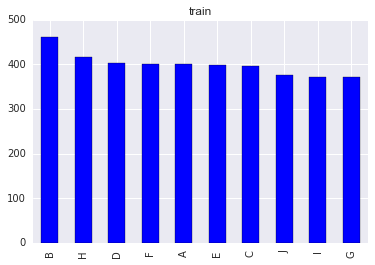

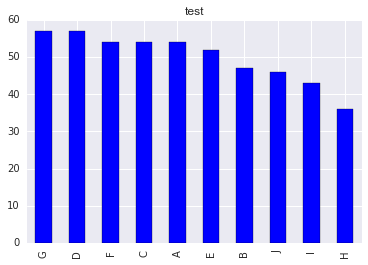

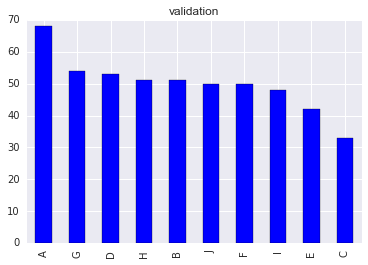

In [296]:
plt.figure()
plt.title('train')
train = label_encoder.inverse_transform(y_train)
df = pd.DataFrame(data = train, columns=['train'])
df.train.value_counts().plot(kind='bar')

plt.figure()
plt.title('test')
test = label_encoder.inverse_transform(y_test)
df = pd.DataFrame(data = test, columns=['test'])
df.test.value_counts().plot(kind='bar')

plt.figure()
plt.title('validation')
validation = label_encoder.inverse_transform(y_validation)
df = pd.DataFrame(data = validation, columns=['validation'])
df.validation.value_counts().plot(kind='bar')

# Logit batch gradient training with TF

In [297]:
train_subset = 10000
graph = tf.Graph()
with graph.as_default():
    tf_train_dataset = tf.constant(X_train[:train_subset, :])
    tf_train_labels = tf.constant(y_train[:train_subset])
    tf_valid_dataset = tf.constant(X_validation)
    tf_test_dataset = tf.constant(X_test)
    weights = tf.Variable(
        tf.truncated_normal([image_size * image_size, num_labels])
    )
    biases = tf.Variable(tf.zeros([num_labels]))
    logits = tf.matmul(tf_train_dataset, weights) + biases
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=tf_train_labels, logits=logits))
    optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)
    train_prediction = tf.nn.softmax(logits)
    valid_prediction = tf.nn.softmax(
    tf.matmul(tf_valid_dataset, weights) + biases
    )
    test_prediction = tf.nn.softmax(tf.matmul(tf_test_dataset, weights) + biases)

In [298]:
num_steps = 801

def accuracy(predictions, labels):
    return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])

with tf.Session(graph=graph) as session:
    tf.global_variables_initializer().run()
    print('Initialized')
    for step in range(num_steps):
        # Run the computations. We tell .run() that we want to run the optimizer,
        # and get the loss value and the training predictions returned as numpy
        # arrays.
        _, l, predictions = session.run([optimizer, loss, train_prediction])
        if (step % 100 == 0):
            print('Loss at step %d: %f' % (step, l))
            print('Training accuracy: %.1f%%' % accuracy(
            predictions, y_train[:train_subset, :]))
            # Calling .eval() on valid_prediction is basically like calling run(), but
            # just to get that one numpy array. Note that it recomputes all its graph
            # dependencies.
            print('Validation accuracy: %.1f%%' % accuracy(
                valid_prediction.eval(), y_validation))
    print('Test accuracy: %.1f%%' % accuracy(test_prediction.eval(), y_test))

Initialized
Loss at step 0: 36.231899
Training accuracy: 9.9%
Validation accuracy: 16.6%
Loss at step 100: 2.064764
Training accuracy: 84.0%
Validation accuracy: 76.6%
Loss at step 200: 1.177915
Training accuracy: 89.5%
Validation accuracy: 81.0%
Loss at step 300: 0.790515
Training accuracy: 92.7%
Validation accuracy: 84.0%
Loss at step 400: 0.560176
Training accuracy: 94.6%
Validation accuracy: 84.8%
Loss at step 500: 0.403116
Training accuracy: 95.9%
Validation accuracy: 86.4%
Loss at step 600: 0.298154
Training accuracy: 96.7%
Validation accuracy: 87.0%
Loss at step 700: 0.224208
Training accuracy: 97.5%
Validation accuracy: 88.0%
Loss at step 800: 0.171811
Training accuracy: 98.0%
Validation accuracy: 88.6%
Test accuracy: 78.2%


# Logit SGD with TF

In [299]:
train_subset = 10000
batch_size = 128
graph = tf.Graph()
with graph.as_default():
#     tf_train_dataset = tf.constant(X_train[:train_subset, :])
    tf_train_dataset = tf.placeholder(tf.float32,
                                      shape=(batch_size, image_size * image_size))
#     tf_train_labels = tf.constant(y_train[:train_subset])
    tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
    tf_valid_dataset = tf.constant(X_validation)
    tf_test_dataset = tf.constant(X_test)
    
    weights = tf.Variable(
        tf.truncated_normal([image_size * image_size, num_labels])
    )
    biases = tf.Variable(tf.zeros([num_labels]))
    
    logits = tf.matmul(tf_train_dataset, weights) + biases
    
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=tf_train_labels, logits=logits))
    optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)
    
    train_prediction = tf.nn.softmax(logits)
    valid_prediction = tf.nn.softmax(
    tf.matmul(tf_valid_dataset, weights) + biases)
    test_prediction = tf.nn.softmax(tf.matmul(tf_test_dataset, weights) + biases)


In [305]:
num_steps = 1000

def accuracy(predictions, labels):
    return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])

with tf.Session(graph=graph) as session:
    tf.global_variables_initializer().run()
    print('Initialized')
    for step in range(num_steps):
        # Pick an offset within the training data, which has been randomized.
        # Note: we could use better randomization across epochs.
        offset = (step * batch_size) % (y_train.shape[0] - batch_size)
        # Generate a minibatch.
        batch_data = X_train[offset:(offset + batch_size), :]
        batch_labels = y_train[offset:(offset + batch_size), :]
        # Prepare a dictionary telling the session where to feed the minibatch.
        # The key of the dictionary is the placeholder node of the graph to be fed,
        # and the value is the numpy array to feed to it.
        feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
        _, l, predictions = session.run([optimizer, loss, train_prediction],feed_dict=feed_dict)
        if (step % 100 == 0):
            print('Minibatch loss at step %d: %f' % (step, l))
            print('Minibatch accuracy: %.1f%%' % accuracy(
            predictions, batch_labels))
            # Calling .eval() on valid_prediction is basically like calling run(), but
            # just to get that one numpy array. Note that it recomputes all its graph
            # dependencies.
            print('Validation accuracy: %.1f%%' % accuracy(
                valid_prediction.eval(), y_validation))
    print('Test accuracy: %.1f%%' % accuracy(test_prediction.eval(), y_test))

Initialized
Minibatch loss at step 0: 36.908596
Minibatch accuracy: 9.4%
Validation accuracy: 17.0%
Minibatch loss at step 100: 2.610991
Minibatch accuracy: 82.8%
Validation accuracy: 77.2%
Minibatch loss at step 200: 1.229042
Minibatch accuracy: 85.9%
Validation accuracy: 78.0%
Minibatch loss at step 300: 1.062240
Minibatch accuracy: 90.6%
Validation accuracy: 83.2%
Minibatch loss at step 400: 0.707017
Minibatch accuracy: 85.9%
Validation accuracy: 82.0%
Minibatch loss at step 500: 0.238538
Minibatch accuracy: 93.0%
Validation accuracy: 86.4%
Minibatch loss at step 600: 0.567869
Minibatch accuracy: 93.8%
Validation accuracy: 86.8%
Minibatch loss at step 700: 0.069651
Minibatch accuracy: 98.4%
Validation accuracy: 88.2%
Minibatch loss at step 800: 0.365193
Minibatch accuracy: 97.7%
Validation accuracy: 89.8%
Minibatch loss at step 900: 0.259236
Minibatch accuracy: 96.9%
Validation accuracy: 90.2%
Test accuracy: 79.4%


# Neural net SGD with TF